In [1]:
#import dependencies
import pandas as pd
from sqlalchemy import create_engine
from functions import results_checker
from config import db_password
import psycopg2
import seaborn as sns
from imblearn.combine import SMOTEENN
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
cases_df= pd.read_csv('../../../data/cleaned_data/cre_svi_case_pct.csv', index_col = 'FIPS')
cases_df

,POPUNI,PRED0_PE,PRED12_PE,PRED3_PE,BEDS,dem_pct,Agreeableness,Belief In Science,Collectivism,Conflict Awareness,...,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,AREA_SQMI,first_yr_cases
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,55688,36.94,40.85,22.20,85.0,27.018365,86.279655,70.833333,57.142857,63.444323,...,26168.0,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,594.443459,6589
1003,221898,35.43,40.81,23.76,332.0,22.409030,85.603337,63.268161,67.948815,63.751017,...,28069.0,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,1589.793007,20505
1005,22023,22.81,41.64,35.54,74.0,45.788173,87.711609,63.046939,70.099756,51.165707,...,17249.0,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,885.001636,2227
1007,20393,30.79,44.06,25.14,35.0,20.698280,84.830261,63.262028,72.034797,61.796095,...,18988.0,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,622.461089,2542
1009,57697,31.53,41.51,26.97,40.0,9.569378,85.548096,33.333333,80.000000,63.136502,...,21033.0,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,644.830460,6444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,41888,40.53,42.45,17.02,115.0,22.894957,83.811791,68.303853,68.673956,62.498854,...,30945.0,79.384759,79.347081,68.147062,73.938691,76.390464,67.420658,70.956334,10426.975725,4022
56039,23390,31.00,49.45,19.55,48.0,66.599040,82.886955,73.489916,63.115088,61.166618,...,46499.0,71.547359,80.522872,65.399695,79.598153,79.698193,70.877600,70.938645,3996.844622,3609
56041,20183,38.37,46.31,15.32,42.0,16.819960,84.272810,67.029022,67.552392,60.175516,...,25636.0,78.771570,77.859042,67.603416,69.705859,73.332067,67.404487,69.299391,2081.719807,2128


In [3]:
# drop counties with 0 cases 
## these seem to be errors- mostly in Utah, some counties with large populations
zeros = cases_df.loc[cases_df['first_yr_cases']==0]
cases_df = cases_df.drop(index = zeros.index)
cases_df

,POPUNI,PRED0_PE,PRED12_PE,PRED3_PE,BEDS,dem_pct,Agreeableness,Belief In Science,Collectivism,Conflict Awareness,...,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,AREA_SQMI,first_yr_cases
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,55688,36.94,40.85,22.20,85.0,27.018365,86.279655,70.833333,57.142857,63.444323,...,26168.0,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,594.443459,6589
1003,221898,35.43,40.81,23.76,332.0,22.409030,85.603337,63.268161,67.948815,63.751017,...,28069.0,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,1589.793007,20505
1005,22023,22.81,41.64,35.54,74.0,45.788173,87.711609,63.046939,70.099756,51.165707,...,17249.0,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,885.001636,2227
1007,20393,30.79,44.06,25.14,35.0,20.698280,84.830261,63.262028,72.034797,61.796095,...,18988.0,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,622.461089,2542
1009,57697,31.53,41.51,26.97,40.0,9.569378,85.548096,33.333333,80.000000,63.136502,...,21033.0,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,644.830460,6444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,41888,40.53,42.45,17.02,115.0,22.894957,83.811791,68.303853,68.673956,62.498854,...,30945.0,79.384759,79.347081,68.147062,73.938691,76.390464,67.420658,70.956334,10426.975725,4022
56039,23390,31.00,49.45,19.55,48.0,66.599040,82.886955,73.489916,63.115088,61.166618,...,46499.0,71.547359,80.522872,65.399695,79.598153,79.698193,70.877600,70.938645,3996.844622,3609
56041,20183,38.37,46.31,15.32,42.0,16.819960,84.272810,67.029022,67.552392,60.175516,...,25636.0,78.771570,77.859042,67.603416,69.705859,73.332067,67.404487,69.299391,2081.719807,2128


In [4]:
cases_df['pop_density'] = cases_df['POPUNI']/cases_df['AREA_SQMI']

In [5]:
#create variable for case% for each counties population
cases_df['case_pct'] = cases_df['first_yr_cases']/cases_df['POPUNI']*100
cases_df['case_pct'].head()

FIPS
1001    11.831993
1003     9.240732
1005    10.112155
1007    12.465062
1009    11.168692
Name: case_pct, dtype: float64

In [6]:
cases_df['case_pct'].describe()

count    3034.000000
mean        9.758856
std         3.366790
min         0.269654
25%         7.897249
50%         9.672952
75%        11.471020
max        67.529189
Name: case_pct, dtype: float64

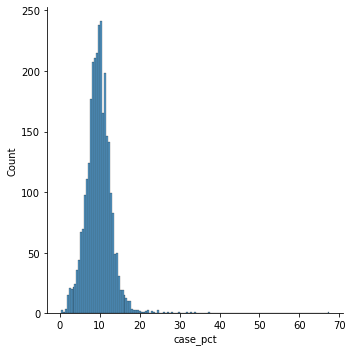

In [7]:
sns.displot(cases_df['case_pct'])

In [8]:
cases_df[cases_df['case_pct']>cases_df['case_pct'].quantile(.9)]

,POPUNI,PRED0_PE,PRED12_PE,PRED3_PE,BEDS,dem_pct,Agreeableness,Belief In Science,Collectivism,Conflict Awareness,...,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,AREA_SQMI,first_yr_cases,pop_density,case_pct
FIPS,,,,,,,,,,,,,,,,,,,,,
1011,8600,24.12,41.09,34.79,61.0,74.701929,88.087725,58.255886,70.360024,68.224716,...,76.822692,76.543950,71.009560,77.986634,67.040670,72.070413,622.805368,1207,13.808487,14.034884
1025,23522,24.65,43.70,31.66,114.0,43.814237,88.437816,61.606972,72.005306,61.887794,...,75.131702,76.657455,70.682581,79.530389,63.754745,72.233031,1238.419891,3459,18.993558,14.705382
1055,101051,31.43,40.89,27.68,627.0,24.235250,84.883984,61.948235,66.626097,61.560177,...,78.598768,78.205440,60.027721,78.247608,65.746092,67.037670,535.281621,13647,188.781000,13.505062
1059,31274,27.70,43.90,28.40,125.0,16.584513,86.556291,64.880029,67.824056,58.286354,...,78.738869,80.244657,44.100571,74.871492,69.394039,69.865458,633.918250,4185,49.334437,13.381723
1065,14597,23.50,43.44,33.05,39.0,59.025316,94.206027,63.270815,66.835465,49.361052,...,80.084965,75.773969,71.857331,76.346049,70.092198,69.841141,643.982272,2162,22.666773,14.811263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51159,7495,27.11,42.08,30.81,0.0,12.294816,86.826479,66.959056,65.628478,46.268270,...,80.171740,74.893570,75.026383,79.733270,73.487512,67.273963,191.477799,1406,39.142919,18.759173
55027,82698,41.66,40.33,18.00,245.0,33.768272,85.094407,67.096625,67.222098,59.990034,...,76.128405,71.559778,69.279734,76.449760,66.140875,72.305675,875.707514,12413,94.435641,15.010037
55053,19512,33.83,40.80,25.37,25.0,41.791045,84.778366,66.743525,69.452854,59.967384,...,76.600583,70.436883,77.428026,76.369420,73.647828,69.428626,987.216260,2638,19.764666,13.519885


In [9]:
cases_df['case_pct'].quantile(.962)


15.221075929003403

In [10]:
# bin and cut the case_pct column into 2 classifications
q = cases_df['case_pct'].mean()+((cases_df['case_pct'].quantile(.75)-cases_df['case_pct'].quantile(.25))*1.5)
bins = [0, q , 40]
labels = ['low','high']
cases_df['case_class'] = pd.cut(cases_df['case_pct'], bins, labels = labels)
cases_df['case_class']

FIPS
1001      low
1003      low
1005      low
1007      low
1009      low
         ... 
56037     low
56039    high
56041     low
56043     low
56045     low
Name: case_class, Length: 3034, dtype: category
Categories (2, object): ['low' < 'high']

In [11]:
q

15.119512351269456

In [12]:
cases_df['case_class'].value_counts()

low     2916
high     117
Name: case_class, dtype: int64

In [13]:
#turn case % classifications into binary 
cases_df = pd.get_dummies(cases_df, columns = ['case_class'])
cases_df

,POPUNI,PRED0_PE,PRED12_PE,PRED3_PE,BEDS,dem_pct,Agreeableness,Belief In Science,Collectivism,Conflict Awareness,...,Risk Taking,Selflessness,Tolerance,Work Ethic,AREA_SQMI,first_yr_cases,pop_density,case_pct,case_class_low,case_class_high
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,55688,36.94,40.85,22.20,85.0,27.018365,86.279655,70.833333,57.142857,63.444323,...,53.333333,82.142857,70.000000,60.380952,594.443459,6589,93.680903,11.831993,1,0
1003,221898,35.43,40.81,23.76,332.0,22.409030,85.603337,63.268161,67.948815,63.751017,...,67.272980,75.586018,66.983549,70.972246,1589.793007,20505,139.576661,9.240732,1,0
1005,22023,22.81,41.64,35.54,74.0,45.788173,87.711609,63.046939,70.099756,51.165707,...,76.066481,78.753019,65.170377,68.704105,885.001636,2227,24.884700,10.112155,1,0
1007,20393,30.79,44.06,25.14,35.0,20.698280,84.830261,63.262028,72.034797,61.796095,...,75.136154,76.929754,69.859503,67.931677,622.461089,2542,32.761887,12.465062,1,0
1009,57697,31.53,41.51,26.97,40.0,9.569378,85.548096,33.333333,80.000000,63.136502,...,57.603815,79.307632,64.953288,76.000000,644.830460,6444,89.476232,11.168692,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,41888,40.53,42.45,17.02,115.0,22.894957,83.811791,68.303853,68.673956,62.498854,...,73.938691,76.390464,67.420658,70.956334,10426.975725,4022,4.017272,9.601795,1,0
56039,23390,31.00,49.45,19.55,48.0,66.599040,82.886955,73.489916,63.115088,61.166618,...,79.598153,79.698193,70.877600,70.938645,3996.844622,3609,5.852116,15.429671,0,1
56041,20183,38.37,46.31,15.32,42.0,16.819960,84.272810,67.029022,67.552392,60.175516,...,69.705859,73.332067,67.404487,69.299391,2081.719807,2128,9.695349,10.543527,1,0


In [14]:
X_df = cases_df.drop(columns= ['case_pct','case_class_low','case_class_high','first_yr_cases','POPUNI'])
X_df.columns.to_list()

['PRED0_PE',
 'PRED12_PE',
 'PRED3_PE',
 'BEDS',
 'dem_pct',
 'Agreeableness',
 'Belief In Science',
 'Collectivism',
 'Conflict Awareness',
 'Conscientiousness',
 'Empathy',
 'Employment Rate',
 'Entrepreneurship',
 'Extraversion',
 'Gender Equality',
 'Hopefulness',
 'Income Per Capita',
 'Neuroticism',
 'Openness',
 'Religiosity',
 'Risk Taking',
 'Selflessness',
 'Tolerance',
 'Work Ethic',
 'AREA_SQMI',
 'pop_density']

In [15]:
X = X_df
y= cases_df['case_class_high']

In [16]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .7, random_state=78)

## SMOTEENN sampling


In [17]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()


In [18]:
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [19]:
model = model.fit(X_resampled, y_resampled)

In [20]:
y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
   cm, index=["Actual 0", "Actual 1"],
   columns=["Predicted 0", "Predicted 1"]
)
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,804,73
Actual 1,0,34


In [21]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.9583808437856328

In [22]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.92      1.00      0.96      0.96      0.91       877
          1       0.32      1.00      0.92      0.48      0.96      0.92        34

avg / total       0.97      0.92      1.00      0.94      0.96      0.91       911



## random forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestClassifier(n_estimators=128, random_state=0)

In [24]:
# Fitting the model
rf_model = rf_model.fit(X_resampled, y_resampled)
rf_pred = rf_model.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, rf_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,850,27
Actual 1,0,34


In [26]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, rf_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.97      1.00      0.98      0.98      0.97       877
          1       0.56      1.00      0.97      0.72      0.98      0.97        34

avg / total       0.98      0.97      1.00      0.97      0.98      0.97       911



In [30]:
results_checker(cases_df, y_test, rf_pred, 'case_class_high', 'case_pct', q)

Cutoff point for a "high" classification: 15.12%
Total count of missclassified counties: 27, or 2.964% of 911 counties
Count of missclassified counties that are above the 0.9 quantile (13.216%): 6
Count of missclassified counties that are above the 0.75 quantile (11.471%): 18
Count of missclassified counties that are above the 0.5 quantile (9.673%): 24
Count of missclassified counties that are below the 0.49 quantile (9.624%): 3
Count of missclassified counties that are below the 0.25 quantile (7.897%): 0
Count of missclassified counties that are below the 0.1 quantile (6.027%): 0


In [27]:
import time
import numpy as np

start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.037 seconds


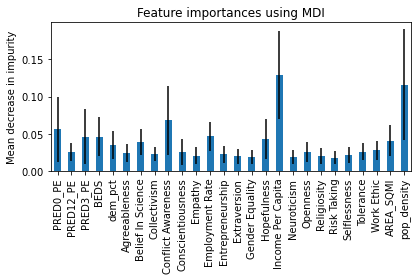

In [28]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=X_df.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## predict entire dataset?

In [31]:
rf_pred_all = rf_model.predict(X)

In [32]:
cm = confusion_matrix(y, rf_pred_all)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,2809,108
Actual 1,0,117


In [33]:
test = pd.DataFrame(y)
preds = pd.DataFrame(rf_pred_all, columns = ['preds'])
preds = preds.set_index(test.index)
results = test.merge(preds, how = 'left', left_index=True, right_index=True)
results

,case_class_high,preds
FIPS,,
1001,0,0
1003,0,0
1005,0,1
1007,0,0
1009,0,0
...,...,...
56037,0,0
56039,1,1
56041,0,0


In [34]:
results_checker(cases_df, y, rf_pred_all, 'case_class_high', 'case_pct', q)

Cutoff point for a "high" classification: 15.12%
Total count of missclassified counties: 108, or 3.56% of 3034 counties
Count of missclassified counties that are above the 0.9 quantile (13.216%): 22
Count of missclassified counties that are above the 0.75 quantile (11.471%): 57
Count of missclassified counties that are above the 0.5 quantile (9.673%): 84
Count of missclassified counties that are below the 0.49 quantile (9.624%): 24
Count of missclassified counties that are below the 0.25 quantile (7.897%): 10
Count of missclassified counties that are below the 0.1 quantile (6.027%): 3
